In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from scipy.stats import norm
%matplotlib inline

In [2]:
# Get the dataset
hr = pd.read_csv ("heart.csv")  

In [3]:
# Loading the dataset
hr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# To see the size of your data
hr.shape

(303, 14)

In [5]:
# To view the statistical characteristics of the data
hr.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# To check column names
hr.columns  

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# To Find the Numerical Features,Categorical Features, Alphanumeric Features
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Checking null values
hr.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Change the sex(0,1)=(female,male)
hr["sex"] = hr["sex"].replace({0: "female",1: "male"}) 
hr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


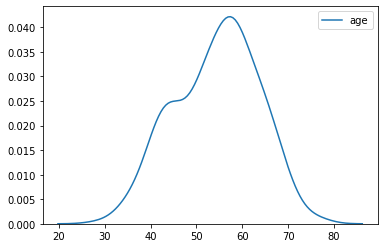

In [14]:
# Create kdeplot for showing age
sns.kdeplot(hr.age)  
plt.show()

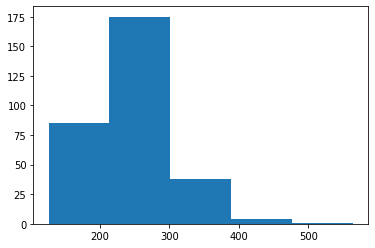

In [15]:
# Create Histogram for showing cholesterol with number of bins 5
plt.hist(hr.chol,bins = 5) 
plt.show()

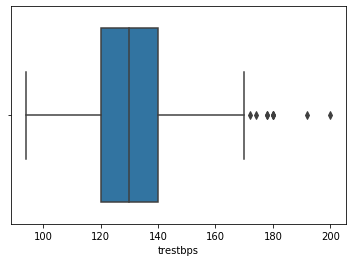

In [16]:
# Create Boxplot for showing trestbps and comment what the dark spot indicate
sns.boxplot(hr.trestbps)  
plt.show()

The darkspot outside the boxplot indicate the outliers where as the centre line of boxplot indicate median

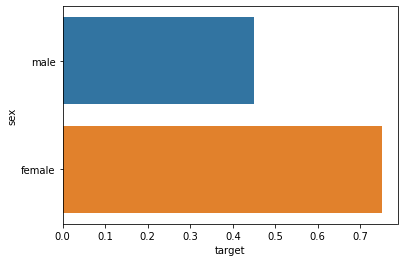

In [17]:
# Draw a bar plot of target by sex
sns.barplot(x="target", y="sex",hue=None,data=hr,ci=0)  
plt.show()

In [18]:
# Print percentages of females vs. males Heart Disease
hr["target"] [hr.sex=="female"].value_counts (normalize=True)*100
hr["target"] [hr.sex=="male"].value_counts (normalize=True)*100  

0    55.072464
1    44.927536
Name: target, dtype: float64

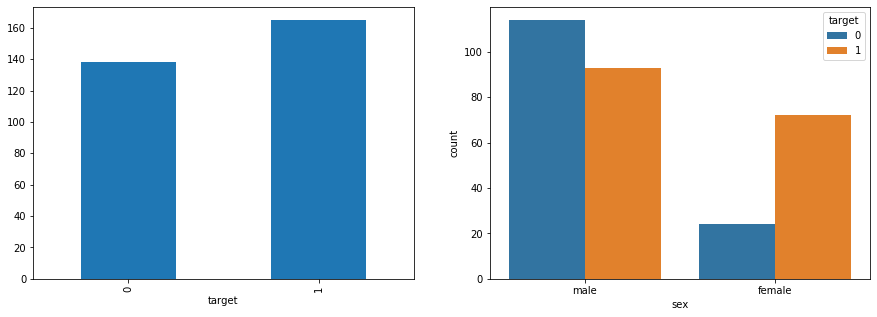

In [19]:
# Create Bar plot for checking the both "target" vs "Sex"
# Create a subplot
fig,a = plt.subplots (1,2,figsize=(15,5))  
# Create bar plot using groupby
hr.groupby (["target"]).count()["sex"].plot(kind="bar", ax = a[0])  
# Create count plot
sns.countplot(x="sex",data=hr,hue="target", ax = a[1]) 
plt.show()

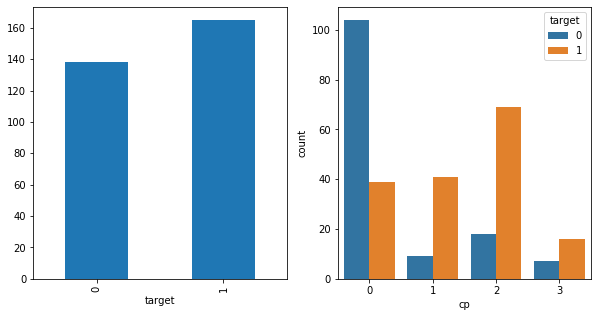

In [20]:
# Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart  Disease or Not
# Create a subplot
fig ,a = plt.subplots(1,2,figsize=(10,5))  
# Create bar plot using groupby
hr.groupby(["target"]).count( )["cp"].plot (kind="bar", ax = a[0])  
# Create count plot
sns.countplot (x = "cp", data = hr, hue = "target", ax = a[1])  
#plt.show()

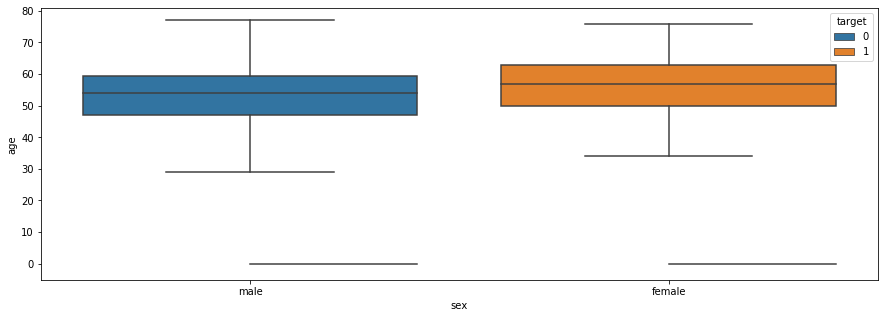

In [22]:
# Create violinplot plot for checking the "fasting_blood_sugar" and "Age" vs "target"
# Create a subplot
fig,a = plt.subplots (figsize = (15,5)) 
# Create violinplot plot using groupby
g1 = hr.groupby (["fbs"]).count() ["age"]  
# Create violin plot
sns.violinplot (x = "age", y = "fbs", hue = "target", data = hr)  
# Create a box plot for Sex & Age
sns.boxplot (x = "sex", y = "age", data = hr)
plt.show()

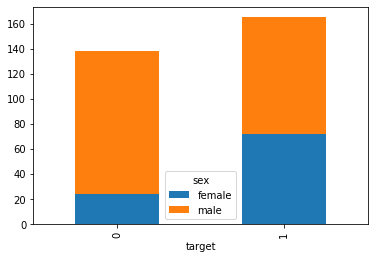

In [23]:
# Create a Stacked bar chart for showing "target" & "Sex" by crosstab feature
# Create crosstab
pd.crosstab (hr ["target"], hr["sex"]).plot (kind = "bar", stacked = True)  

# Overall Observations: 

1. We can see the age is group if varying from 20 to 80 years and also two dome which mean data is not normal.; 
2. Majority of the cases are having cholesterol between the range of 200-300  while very few cases have between 400-600.; 3. We can clear see that female are suffering  more by heart disease then Male.; 
4.Allthough here the case of heart disease are more in chest pain  type 0 but critical condn are observe in type 2.; 
5.Most of the cases are with female consider there age as the one factor which means female suffer it more at early age then male. 